# Blood Pressure Prediction - Regression

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Can we predict a high diastolic blood pressure from the other indicators?

In [211]:
df = pd.read_csv("datasets/health_train.csv")

In [212]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [213]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [214]:
# Drop columns with no predictive power and of no interest
df.drop(columns = ["id","TenYearCHD"],axis = 1, inplace = True)

In [215]:
df.shape

(3390, 15)

In [216]:
# Check null values
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
dtype: int64

In [217]:
# Drop nulls
df = df.dropna()

In [218]:
df.shape

(2927, 15)

In [219]:
# Check basic stats
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [220]:
# Remove columns that indicate the person DOES have high blood pressure (can we predict without these?)
df = df.drop(columns = ["BPMeds","prevalentHyp","sysBP"],axis= 1)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   diabetes         2927 non-null   int64  
 7   totChol          2927 non-null   float64
 8   diaBP            2927 non-null   float64
 9   BMI              2927 non-null   float64
 10  heartRate        2927 non-null   float64
 11  glucose          2927 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 297.3+ KB


## Exploratory Analysis

### Numerical variables

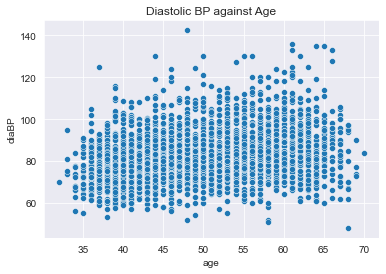

In [222]:
sns.scatterplot(data = df, x = "age", y= "diaBP")
plt.title("Diastolic BP against Age");

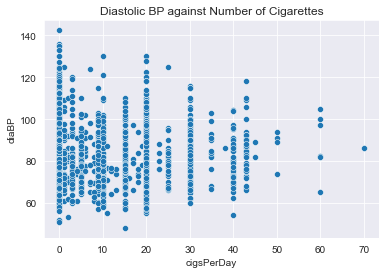

In [223]:
sns.scatterplot(data = df, x = "cigsPerDay", y= "diaBP")
plt.title("Diastolic BP against Number of Cigarettes");

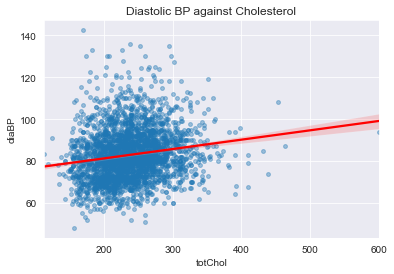

In [224]:
sns.regplot(data = df, x = "totChol", y= "diaBP",scatter_kws={"alpha":0.4,"s":15}, line_kws={"color": "red"})
plt.title("Diastolic BP against Cholesterol");

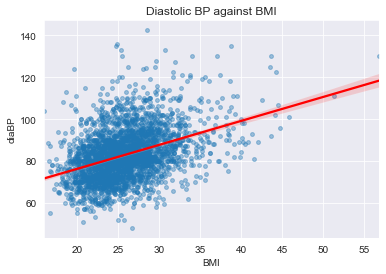

In [225]:
sns.regplot(data = df, x = "BMI", y= "diaBP",scatter_kws={"alpha":0.4,"s":15}, line_kws={"color": "red"})
plt.title("Diastolic BP against BMI");

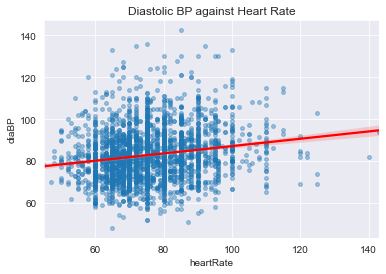

In [226]:
sns.regplot(data = df, x = "heartRate", y= "diaBP",scatter_kws={"alpha":0.4,"s":15}, line_kws={"color": "red"})
plt.title("Diastolic BP against Heart Rate");

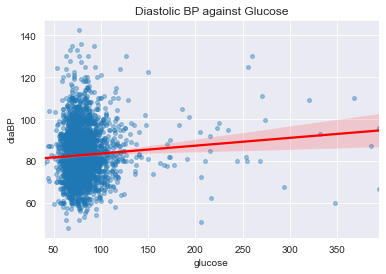

In [227]:
sns.regplot(data = df, x = "glucose", y= "diaBP",scatter_kws={"alpha":0.4,"s":15}, line_kws={"color": "red"})
plt.title("Diastolic BP against Glucose");

There do appear to be some positive relationships between these features and diastolic blood pressure except perhaps with the glucose levels

### Categorical variables

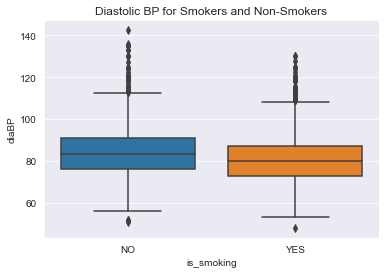

In [228]:
sns.boxplot(data = df, x = "is_smoking", y = "diaBP")
plt.title("Diastolic BP for Smokers and Non-Smokers");

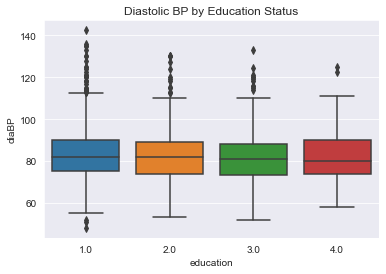

In [229]:
sns.boxplot(data = df, x = "education", y = "diaBP")
plt.title("Diastolic BP by Education Status");

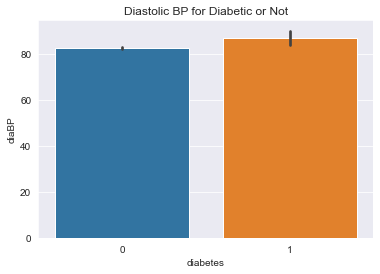

In [230]:
sns.barplot(data = df, x = "diabetes", y = "diaBP")
plt.title("Diastolic BP for Diabetic or Not");

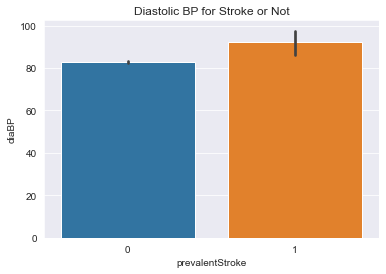

In [231]:
sns.barplot(data = df, x = "prevalentStroke", y = "diaBP")
plt.title("Diastolic BP for Stroke or Not");

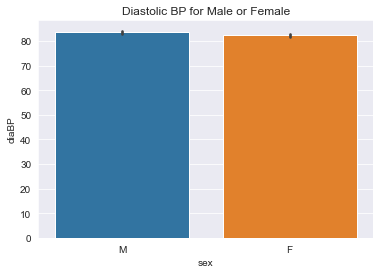

In [232]:
sns.barplot(data = df, x = "sex", y = "diaBP")
plt.title("Diastolic BP for Male or Female");

In [233]:
# Convert sex and smoking status to zero and one
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df["sex"] = l.fit_transform(df["sex"])
df["is_smoking"] = l.fit_transform(df["is_smoking"])

In [234]:
# Correlation using Spearman's Rank Correlation Coefficient as there are categorical and numerical variables in the data
corr = df.corr(method = "spearman")
corr

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
age,1.000000,-0.188446,-0.036291,-0.201947,-0.204252,0.050761,0.110026,0.306954,0.229036,0.151229,0.011562,0.106081
education,-0.188446,1.000000,0.012120,0.036401,0.027388,-0.025668,-0.060679,-0.022693,-0.064203,-0.142068,-0.049372,-0.018194
sex,-0.036291,0.012120,1.000000,0.223871,0.312186,-0.009121,0.007311,-0.066277,0.061946,0.139060,-0.116452,-0.027142
is_smoking,-0.201947,0.036401,0.223871,1.000000,0.931566,-0.051558,-0.050831,-0.048513,-0.138071,-0.171735,0.062444,-0.084286
cigsPerDay,-0.204252,0.027388,0.312186,0.931566,1.000000,-0.053543,-0.051918,-0.037292,-0.105820,-0.137484,0.064169,-0.094240
prevalentStroke,0.050761,-0.025668,-0.009121,-0.051558,-0.053543,1.000000,0.013866,0.004797,0.057746,0.014857,-0.012818,0.013458
diabetes,0.110026,-0.060679,0.007311,-0.050831,-0.051918,0.013866,1.000000,0.053037,0.057915,0.077671,0.045870,0.215581
totChol,0.306954,-0.022693,-0.066277,-0.048513,-0.037292,0.004797,0.053037,1.000000,0.190048,0.151337,0.090829,0.039553
diaBP,0.229036,-0.064203,0.061946,-0.138071,-0.105820,0.057746,0.057915,0.190048,1.000000,0.382744,0.176149,0.056180
BMI,0.151229,-0.142068,0.139060,-0.171735,-0.137484,0.014857,0.077671,0.151337,0.382744,1.000000,0.068100,0.072622


Features positively correlated most highly with the diastolic blood pressure are age, cholesterol levels, BMO and heartrate. Negative correlations are with education and number of cigarettes per day

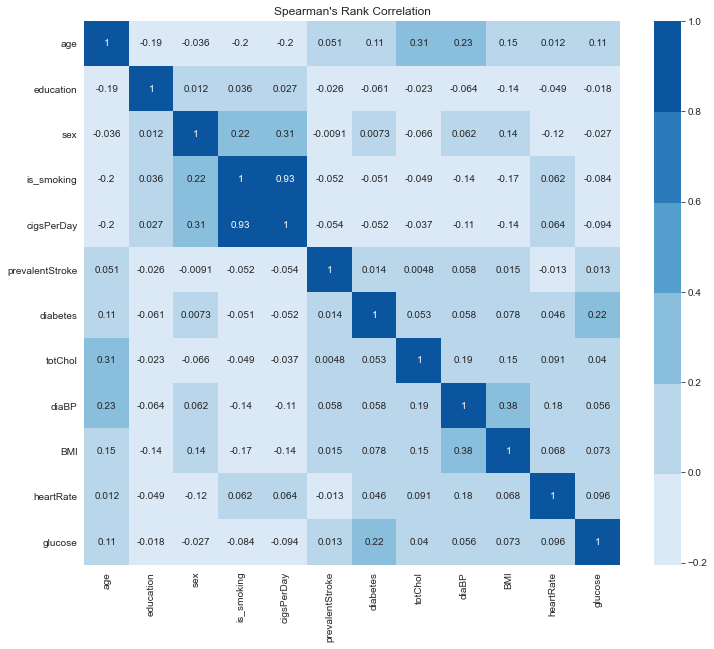

In [235]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = sns.color_palette("Blues"))
plt.title("Spearman's Rank Correlation");

In [236]:
# Convert the education and cigarettes per day to integer values
df["education"] = df["education"].astype(int)
df["cigsPerDay"] = df["cigsPerDay"].astype(int)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   int32  
 2   sex              2927 non-null   int32  
 3   is_smoking       2927 non-null   int32  
 4   cigsPerDay       2927 non-null   int32  
 5   prevalentStroke  2927 non-null   int64  
 6   diabetes         2927 non-null   int64  
 7   totChol          2927 non-null   float64
 8   diaBP            2927 non-null   float64
 9   BMI              2927 non-null   float64
 10  heartRate        2927 non-null   float64
 11  glucose          2927 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 331.5 KB


In [238]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4,1,0,0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1,0,1,10,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1,1,1,20,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1,0,1,30,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3,0,0,0,0,0,272.0,121.0,32.80,85.0,65.0


In [239]:
# Split into X and y variables
X = df.drop("diaBP",axis = 1)
y = df["diaBP"]

In [240]:
# Split into training and test sets (do this before scaling the train and test sets is the best approach)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2341, 11) (586, 11) (2341,) (586,)


In [241]:
# Separate numeric and categoric variables 
numeric_train = X_train[["age","cigsPerDay","totChol","BMI","heartRate","glucose"]]
numeric_test = X_test[["age","cigsPerDay","totChol","BMI","heartRate","glucose"]]
cat_train = X_train[["education","sex","is_smoking","prevalentStroke","diabetes"]]
cat_test = X_test[["education","sex","is_smoking","prevalentStroke","diabetes"]]

In [249]:
# Standardise the numeric values 
scale = StandardScaler()
scaled_train = pd.DataFrame(scale.fit_transform(numeric_train))
scaled_test = pd.DataFrame(scale.transform(numeric_test))

scaled_train.columns = [["age","cigsPerDay","totChol","BMI","heartRate","glucose"]]
scaled_test.columns = [["age","cigsPerDay","totChol","BMI","heartRate","glucose"]]

scaled_train.reset_index(drop = True, inplace = True)
scaled_test.reset_index(drop = True, inplace = True)
cat_train.reset_index(drop = True, inplace = True)
cat_test.reset_index(drop = True, inplace = True)

In [252]:
X_train = pd.concat([scaled_train,cat_train],axis = 1)
X_test = pd.concat([scaled_test, cat_test], axis = 1)

In [253]:
X_train.describe()

,"(age,)","(cigsPerDay,)","(totChol,)","(BMI,)","(heartRate,)","(glucose,)",education,sex,is_smoking,prevalentStroke,diabetes
count,2.341000e+03,2.341000e+03,2.341000e+03,2.341000e+03,2.341000e+03,2.341000e+03,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000
mean,-2.959330e-16,-7.208625e-17,3.065562e-16,-2.564753e-16,-4.431407e-16,-2.276408e-17,1.967108,0.443400,0.492097,0.005980,0.027766
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.025001,0.496892,0.500044,0.077118,0.164337
min,-2.052466e+00,-7.706434e-01,-2.775907e+00,-2.368625e+00,-2.581664e+00,-1.639803e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.842904e-01,-7.706434e-01,-7.005256e-01,-6.655554e-01,-6.573795e-01,-4.601309e-01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.656754e-02,-7.706434e-01,-5.336376e-02,-9.546027e-02,-7.172777e-02,-1.652130e-01,2.000000,0.000000,0.000000,0.000000,0.000000
75%,7.511553e-01,9.214183e-01,6.161141e-01,5.251497e-01,5.975885e-01,2.139671e-01,3.000000,1.000000,1.000000,0.000000,0.000000
max,2.386601e+00,5.151572e+00,8.091950e+00,7.455294e+00,5.366467e+00,1.314822e+01,4.000000,1.000000,1.000000,1.000000,1.000000


In [255]:
# Set up models
lr = LinearRegression()
svr = SVR()
kn = KNeighborsRegressor()
rf = RandomForestRegressor()

In [256]:
# Function to run each model against the data

def run_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return train_score, test_score

In [259]:
print(run_model(lr))
print(run_model(svr))
print(run_model(kn))
print(run_model(rf))

(0.20586171498731265, 0.264684605600496)
(0.20720551804310328, 0.21179864574520035)
(0.35332841336636933, 0.13430096644132883)
(0.8805394178700078, 0.20214202161461137)


Training accuracy is poor for the first three models but high for the random forest. However, the test accuracies are poor for all models. The random forest model clearly overfits. We cannot predict blood pressure values from the other features in this dataset, once the highly related features of being already diagnosed as hypertensive, on blood pressure meds and a high systolic blood pressure are removed from the data.